In [418]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from math import sqrt
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [419]:
# First load the sample
pd.set_option('display.max_columns', None)
HH_Public = pd.read_csv("./data/assignment1/HH_Public.csv")
LINKED_Public = pd.read_csv("./data/assignment1/LINKED_Public.csv")
PLACE_Public = pd.read_csv("./data/assignment1/PLACE_Public.csv")
UNLINKED_Public = pd.read_csv("./data/assignment1/UNLINKED_Public.csv")
VEH_Public = pd.read_csv("./data/assignment1/VEH_Public.csv")
PER_Public = pd.read_csv("./data/assignment1/PER_Public.csv",sep=",", encoding='cp1252')
df_tracts= gpd.read_file('./data/assignment1/2010 Census Tracts/geo_export_510d517f-bf5f-4f5f-95a5-8c1bcbeb8109.shp')

In [420]:
LINKED_Public.head()

,PLSAM,SAMPN,PERNO,PLANO,PERTYPE,ORIG_HOME,GTYPE,HHSIZE,DEST_HOME,LTRIPNO,TOUR_ID,SUBT_ID,DTYPE,TOUR_PURP,DOW,HTAZ,HTRACT,OTAZ,DTAZ,NO_TAZ,OTPURP,DTPURP,OTPURP_AGG,DTPURP_AGG,DTPURP2,LTMODE_AGG,MODE_SAMP,TOTTR,HHMEM,PER1,PER2,PER3,PER4,PER5,NONHH,VEHNO,DYGOV,PLOC,PRKTY,PAYPK,PKAMT,PKUNT,TOLFT,TLONB,TLFC1,TOPN1,TOLE1,TOLX1,TLLC1,TLFR1,TLFC2,TOPN2,TOLE2,TOLX2,TLLC2,TLFR2,TLFC3,TOPN3,TOLE3,TOLX3,TLLC3,TLFR3,O_TLFR3,ROUTE,SERVC,FARE,FAREC,BUSPS,MTABP,BPFAR,FRBAS,TRP_DEP_HR,TRP_DEP_MIN,TRP_ARR_HR,TRP_ARR_MIN,TRPDUR,ACTDUR,TRIPDIST,TRPDIST_HN,TRPDUR_HN,OTRACT,DTRACT,OMCD,DMCD,OZIP,DZIP,UNIQUEID2,UNIQUEID3,UNIQUEID4,HH1,HH_WHT2,TOURFAC,WHT_FAC3,WHT_FAC3_VOCC,HCOUNTY,HCITY_MCD,HSTATE,HZIP,HNYC,HMPO,ONYC,OMPO,DNYC,DMPO,GEO_GROUP1,GEO_GROUP2,GEO_GROUP3,GEO_GROUP1_O,GEO_GROUP2_O,GEO_GROUP3_O,GEO_GROUP1_D,GEO_GROUP2_D,GEO_GROUP3_D,ADJ_COUNTY,OCOUNTY,DCOUNTY,PMODE,PMODE1,PAMODE,PMODE_R,PMODE_R2,PMODE_R3,WORK_PURP,DTPURP_R,ODTPURP,ODTPURP1,ODTPURP2,ODTPURP2_R,WORKTRIP,TOD_R,TOD_R1,TOD_PEAK,TOTTR_R,TRPDUR_R,TRIPDIST_R1,TRIPDIST_R2,HHSIZ_R,INCOM_R,HHVEH_R
0,30000560102,3000056,1,2,2,1,2,6,0,1,1,0,1.0,9,3,2626,9001205100,2626,2627,0,3,24,0,9,0,1.0,9.0,1,0,,,,,,0,2,1,1,1,2,,,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,7,29.0,7,36.0,7,59,1.17447,2.81,6.69,9001205100,9001205200,900108980,900108992,6804,6804,3000056010101,30000560101,300005601010,1510.0,1846.72807,1.156645,2136.008377,2136.008377,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,6,4,3,1,9001,9001,19,11,,1,1,1,2,3,3,3,4,3,2,1,1,1,1,1,2,3,4,3,3
1,30000560103,3000056,1,3,2,0,2,6,1,2,1,0,3.0,9,3,2626,9001205100,2627,2626,0,24,3,9,0,0,1.0,9.0,1,0,,,,,,0,2,,,,,,,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,8,35.0,8,42.0,7,235,1.17447,2.81,6.71,9001205200,9001205100,900108980,900108992,6804,6804,3000056010102,30000560101,300005601010,1510.0,1846.72807,1.156645,2136.008377,2136.008377,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,6,4,3,1,9001,9001,19,11,,1,1,1,2,0,6,10,4,3,2,1,1,1,1,1,2,3,4,3,3
2,30000560104,3000056,1,4,2,1,2,6,0,1,2,0,1.0,1,3,2626,9001205100,2626,2627,0,3,9,0,1,0,1.0,9.0,1,0,,,,,,0,2,1,1,1,2,,,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,12,37.0,12,45.0,8,152,1.17447,2.81,6.69,9001205100,9001205200,900108980,900108992,6804,6804,3000056010201,30000560102,300005601020,1510.0,1846.72807,0.732451,1352.636918,1352.636918,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,6,4,3,1,9001,9001,19,11,,1,1,1,1,1,1,1,1,1,1,2,2,0,1,1,2,3,4,3,3
3,30000560105,3000056,1,5,2,0,2,6,1,2,2,0,3.0,1,3,2626,9001205100,2627,2626,0,9,3,1,0,0,2.1,9.0,2,1,5,,,,,0,2,,,,,,,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,15,17.0,15,24.0,7,176,1.17447,2.81,6.71,9001205200,9001205100,900108980,900108992,6804,6804,3000056010202,30000560102,300005601020,1510.0,1846.72807,0.732451,1352.636918,676.318459,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,6,4,3,1,9001,9001,19,11,,1,1,1,1,0,4,8,1,1,1,2,2,0,2,1,2,3,4,3,3
4,30000560106,3000056,1,6,2,1,2,6,0,1,3,0,1.0,9,3,2626,9001205100,2626,2628,0,3,25,0,9,0,2.1,9.0,3,2,5,6,,,,0,2,1,1,1,2,,,2,0,,,,,,,,,,,,,,,,,,,,,,,,,,,,18,20.0,18,29.0,9,36,1.00992,3.47,8.62,9001205100,9001205300,900108980,900108992,6804,6804,3000056010301,30000560103,300005601030,1510.0,1846.72807,1.126987,2081.238932,693.746311,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,6,4,3,1,9001,9001,19,11,,1,1,1,2,3,3,3,4,3,2,3,3,1,3,1,2,3,4,3,3


In [421]:
UNLINKED_Public.head()

,PLSAM,SAMPN,PERNO,PLANO,ORIG_HOME,GTYPE,HHSIZE,DHOME,TRIPNO,LTRIPNO,LINKFLAG,TOUR_ID,DOW,HTAZ,HTRACT,OTAZ,DTAZ,No_TAZ,OTPURP,DTPURP,OTPURP_AGG,DTPURP_AGG,DTPUR2,ULTMODE,LTMODE_AGG,MODE_SAMP,TOTTR,HHMEM,PER1,PER2,PER3,PER4,PER5,NONHH,VEHNO,DYGOV,PLOC,PRKTY,PAYPK,PKAMT,PKUNT,TOLFT,TLONB,TLFC1,TOPN1,TOLE1,TOLX1,TLLC1,TLFR1,TLFC2,TOPN2,TOLE2,TOLX2,TLLC2,TLFR2,TLFC3,TOPN3,TOLE3,TOLX3,TLLC3,TLFR3,O_TLFR3,ROUTE,SERVC,FARE,FAREC,BUSPS,MTABP,BPFAR,FRBAS,TRP_DEP_HR,TRP_ARR_HR,TRP_DEP_MIN,TRP_ARR_MIN,TRPDUR,ACTDUR,TRIPDIST,OTRACT,DTRACT,OMCD,DMCD,OZIP,DZIP,UNIQUEID1,UNIQUEID2,HH1,HH_WHT2,TOURFAC,WHT_FAC3,HCOUNTY,HCITY_MCD,HSTATE,HZIP,HNYC,HMPO,ONYC,OMPO,DNYC,DMPO,GEO_GROUP1_O,GEO_GROUP2_O,GEO_GROUP3_O,GEO_GROUP1_D,GEO_GROUP2_D,GEO_GROUP3_D,ADJ_COUNTY,OCOUNTY,DCOUNTY
0,30000560102,3000056,1,2,1,2,6,0,1,1,1,1,3,2626,9001205100,2626,2627,0,3,24,0,9,0,5,1.0,9.0,1,0,0,0,0,0,0,0,2,1,1,1,2,,0,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,7,7,29,36,7,59,1.17447,9001205100,9001205200,900108980,900108980,6804,6804,3.000060e+12,3.000060e+12,1510.0,1846.72807,1.156645,2136.008377,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,1,9001,9001
1,30000560103,3000056,1,3,0,2,6,1,2,2,2,1,3,2626,9001205100,2627,2626,0,24,3,9,0,0,5,1.0,9.0,1,0,0,0,0,0,0,0,2,0,0,0,0,,0,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,8,8,35,42,7,235,1.17447,9001205200,9001205100,900108980,900108980,6804,6804,3.000060e+12,3.000060e+12,1510.0,1846.72807,1.156645,2136.008377,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,1,9001,9001
2,30000560104,3000056,1,4,1,2,6,0,1,1,1,2,3,2626,9001205100,2626,2627,0,3,9,0,1,0,5,1.0,9.0,1,0,0,0,0,0,0,0,2,1,1,1,2,,0,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,12,12,37,45,8,152,1.17447,9001205100,9001205200,900108980,900108980,6804,6804,3.000060e+12,3.000060e+12,1510.0,1846.72807,0.732451,1352.636918,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,1,9001,9001
3,30000560105,3000056,1,5,0,2,6,1,2,2,2,2,3,2626,9001205100,2627,2626,0,9,3,1,0,0,5,2.1,9.0,2,1,5,0,0,0,0,0,2,0,0,0,0,,0,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,15,15,17,24,7,176,1.17447,9001205200,9001205100,900108980,900108980,6804,6804,3.000060e+12,3.000060e+12,1510.0,1846.72807,0.732451,1352.636918,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,1,9001,9001
4,30000560106,3000056,1,6,1,2,6,0,1,1,1,3,3,2626,9001205100,2626,2628,0,3,25,0,9,0,5,2.1,9.0,3,2,5,6,0,0,0,0,2,1,1,1,2,,0,2,0,0,,,,,0,0,,,,,0,0,,,,,0,,,0,0,,0,0,,,18,18,20,29,9,36,1.00992,9001205100,9001205300,900108980,900108980,6804,6804,3.000060e+12,3.000060e+12,1510.0,1846.72807,1.126987,2081.238932,9001,BROOKFIELD TOWN,CT,6804,0,3,0,3,0,3,6,4,3,6,4,3,1,9001,9001


In [422]:
bronx = 36005
new_york = 36061
queens = 36081
staten = 36085
brooklyn = 36047
new_york = [bronx, new_york,queens, staten, brooklyn]
new_york

[36005, 36061, 36081, 36085, 36047]

__Subset for trips that either start or end within New York:__
 
Segments are cut down to 1/3, while trips are cut down to 1/4

In [423]:
#UNLINKED_NYC = UNLINKED_Public.loc[(UNLINKED_Public['ONYC'] == 1)&(UNLINKED_Public['DNYC'] == 1)]
LINKED_NYC = LINKED_Public.loc[(LINKED_Public['ONYC'] == 1)&
                               (LINKED_Public['DNYC'] == 1)]
print("Linked Public Original:",LINKED_Public.shape)
print("Linked Public NYC:",LINKED_NYC.shape)

def where_activity(data,activity,o_borough):
    if o_borough == 36005:
        borough = "Bronx"
    elif o_borough == 36061:
        borough = "Manhattan"
    elif o_borough == 36081:
        borough = "Queens"
    elif o_borough == 36085:
        borough = "SI"
    elif o_borough == 36047:
        borough = "Brooklyn"
        
    df = data.loc[(data['OTPURP'] == activity)&
                  (data['OCOUNTY'] == o_borough)]
    
    size = df.shape[0]
    df.loc[(df['DCOUNTY'] == 36005, 'DCOUNTY')] = "Bronx"
    df.loc[(df['DCOUNTY'] == 36061, 'DCOUNTY')] = "Manhattan"
    df.loc[(df['DCOUNTY'] == 36081, 'DCOUNTY')] = "Queens"
    df.loc[(df['DCOUNTY'] == 36085, 'DCOUNTY')] = "SI"
    df.loc[(df['DCOUNTY'] == 36047, 'DCOUNTY')] = "Brooklyn"
    df = df.groupby(['DCOUNTY'])['DCOUNTY'].size().to_frame(name = 'from '+borough)
    df = df['from '+borough]/size
    return(df)

Bronx = where_activity(LINKED_NYC,16,36005)
Manhattan = where_activity(LINKED_NYC,16,36061)
Queens = where_activity(LINKED_NYC,16,36081)
SI = where_activity(LINKED_NYC,16,36085)
Brooklyn = where_activity(LINKED_NYC,16,36047)

origin_destination = pd.merge(Bronx, Manhattan, how='outer', on='DCOUNTY')
origin_destination = pd.merge(origin_destination, Queens, how='outer', on='DCOUNTY')
origin_destination = pd.merge(origin_destination, SI, how='outer', on='DCOUNTY')
origin_destination = pd.merge(origin_destination, Brooklyn, how='outer', on='DCOUNTY')
origin_destination

Linked Public Original: (143925, 139)
Linked Public NYC: (34395, 139)


,from Bronx,from Manhattan,from Queens,from SI,from Brooklyn
DCOUNTY,,,,,
Bronx,0.954545,0.030457,0.002364,NaN,NaN
Brooklyn,0.003497,0.022843,0.014184,0.00625,0.962121
Manhattan,0.034965,0.931472,0.021277,NaN,0.015152
Queens,0.006993,0.012690,0.962175,NaN,0.011364
SI,NaN,0.002538,NaN,0.99375,0.011364


__Overall, what are the characteristics of the grocery trips?__

As expected, each borough starts and ends generally in the same borough. It looks like we may need to zoom into smaller units of analysis?

In [424]:
def where_activity_matrix(activity):
    Bronx_matrix = where_activity(LINKED_NYC,activity,36005)
    Manhattan_matrix = where_activity(LINKED_NYC,activity,36061)
    Queens_matrix = where_activity(LINKED_NYC,activity,36081)
    SI_matrix = where_activity(LINKED_NYC,activity,36085)
    Brooklyn_matrix = where_activity(LINKED_NYC,activity,36047)

    origin_destination_matrix = pd.merge(Bronx_matrix, Manhattan_matrix, how='outer', on='DCOUNTY')
    origin_destination_matrix = pd.merge(origin_destination_matrix, Queens_matrix, how='outer', on='DCOUNTY')
    origin_destination_matrix = pd.merge(origin_destination_matrix, SI_matrix, how='outer', on='DCOUNTY')
    origin_destination_matrix = pd.merge(origin_destination_matrix, Brooklyn_matrix, how='outer', on='DCOUNTY')

    return(origin_destination_matrix)

restaurant = where_activity_matrix(21)
restaurant

,from Bronx,from Manhattan,from Queens,from SI,from Brooklyn
DCOUNTY,,,,,
Bronx,0.883495,0.018054,0.011299,NaN,NaN
Brooklyn,0.009709,0.053159,0.016949,0.061538,0.887029
Manhattan,0.077670,0.882648,0.045198,0.015385,0.071130
Queens,0.029126,0.042126,0.926554,NaN,0.033473
SI,NaN,0.004012,NaN,0.923077,0.008368


It seems that eating out has the same pattern as well. Many people from the Bronx go to Manhattan. Very few people from Manhattan eat out in the Bronx, but will go to Queens or Brooklyn instead. Maybe this means that the Bronx is rather isolated in terms of their business vitality?


In [425]:
work = where_activity_matrix(1)
work

,from Bronx,from Manhattan,from Queens,from SI,from Brooklyn
DCOUNTY,,,,,
Bronx,0.741935,0.031746,NaN,NaN,NaN
Brooklyn,0.032258,0.023810,0.037975,NaN,0.759615
Manhattan,0.193548,0.928571,0.354430,0.208333,0.221154
Queens,0.032258,0.015873,0.607595,0.041667,0.019231
SI,NaN,NaN,NaN,0.750000,NaN


People go into Manhattan for work. Duh.

In [426]:
school = where_activity_matrix(12)
school

,from Bronx,from Manhattan,from Queens,from SI,from Brooklyn
DCOUNTY,,,,,
Bronx,0.940476,0.101504,0.022222,NaN,NaN
Manhattan,0.038690,0.716165,0.016667,NaN,0.020576
Queens,0.020833,0.069549,0.925000,NaN,0.030864
Brooklyn,NaN,0.093985,0.033333,0.012048,0.932099
SI,NaN,0.018797,0.002778,0.987952,0.016461


People also generally stick to their borough. Although it also looks like many people LEAVE Manhattan to go to school? That's strange. Maybe that's because people cannot afford to go to school in Manhattan?

I think the next step I will analyze is the trip distance of these typical grocery trips. If they generally travel further, then it's probably because there are food deserts!

In [427]:
#UNLINKED_NYC = UNLINKED_Public.loc[(UNLINKED_Public['ONYC'] == 1)&(UNLINKED_Public['DNYC'] == 1)]
LINKED_NYC = LINKED_Public.loc[(LINKED_Public['ONYC'] == 1)&
                               (LINKED_Public['DNYC'] == 1)]
#print("Unlinked Public Original:",UNLINKED_Public.shape)
#print("Unlinked Public NYC:",UNLINKED_NYC.shape)
print("Linked Public Original:",LINKED_Public.shape)
print("Linked Public NYC:",LINKED_NYC.shape)

def where_activity_duration(data,activity,o_borough):
    if o_borough == 36005:
        borough = "Bronx"
    elif o_borough == 36061:
        borough = "Manhattan"
    elif o_borough == 36081:
        borough = "Queens"
    elif o_borough == 36085:
        borough = "SI"
    elif o_borough == 36047:
        borough = "Brooklyn"
        
    df = data.loc[(data['OTPURP'] == activity)&
                  (data['OCOUNTY'] == o_borough)]
    
#   size = df.shape[0]
    df.loc[(df['DCOUNTY'] == 36005, 'DCOUNTY')] = "Bronx"
    df.loc[(df['DCOUNTY'] == 36061, 'DCOUNTY')] = "Manhattan"
    df.loc[(df['DCOUNTY'] == 36081, 'DCOUNTY')] = "Queens"
    df.loc[(df['DCOUNTY'] == 36085, 'DCOUNTY')] = "SI"
    df.loc[(df['DCOUNTY'] == 36047, 'DCOUNTY')] = "Brooklyn"
#    df = 
    df = df['TRPDUR'].mean() #.to_frame(name = 'from '+borough)
#    df = df['from '+borough]/size
    return(df)

Bronx = where_activity_duration(LINKED_NYC,16,36005)
Manhattan = where_activity_duration(LINKED_NYC,16,36061)
Queens = where_activity_duration(LINKED_NYC,16,36081)
SI = where_activity_duration(LINKED_NYC,16,36085)
Brooklyn = where_activity_duration(LINKED_NYC,16,36047)

print("Bronx:", Bronx)
print("Manhattan:", Manhattan)
print("Queens:", Queens)
print("SI:", SI)
print("Brooklyn:", Brooklyn)


#grocery_duration = where_activity_duration_matrix(16)
#grocery_duration


Linked Public Original: (143925, 139)
Linked Public NYC: (34395, 139)
Bronx: 15.895104895104895
Manhattan: 14.593908629441625
Queens: 13.761229314420804
SI: 14.10625
Brooklyn: 14.151515151515152


Now we're getting somewhere...people in the Bronx generally travel longer distances to get groceries.

In [428]:
def where_activity_duration_bytract(data,activity,o_borough):
    if o_borough == 36005:
        borough = "Bronx"
    elif o_borough == 36061:
        borough = "Manhattan"
    elif o_borough == 36081:
        borough = "Queens"
    elif o_borough == 36085:
        borough = "SI"
    elif o_borough == 36047:
        borough = "Brooklyn"
        
    df = data.loc[(data['OTPURP'] == activity)]
    
#   size = df.shape[0]
    df.loc[(df['DCOUNTY'] == 36005, 'DCOUNTY')] = "Bronx"
    df.loc[(df['DCOUNTY'] == 36061, 'DCOUNTY')] = "Manhattan"
    df.loc[(df['DCOUNTY'] == 36081, 'DCOUNTY')] = "Queens"
    df.loc[(df['DCOUNTY'] == 36085, 'DCOUNTY')] = "SI"
    df.loc[(df['DCOUNTY'] == 36047, 'DCOUNTY')] = "Brooklyn"
#    df = 
    df = df.groupby(['OTRACT'])['TRPDUR'].mean().to_frame(name = "tract").reset_index()
    df.columns = ['geoid','tract']
#    df = df['from '+borough]/size
    return(df)

activity_number = 16

tract_duration = where_activity_duration_bytract(LINKED_NYC,activity_number,36005)
#tract_duration.rename(columns = {'OTRACT:''geoid'}, inplace = True)
tract_duration

,geoid,tract
0,36005001900,30.000000
1,36005002000,5.000000
2,36005002500,3.000000
3,36005002702,46.333333
4,36005002800,35.000000
...,...,...
750,36085029103,11.500000
751,36085029104,13.000000
752,36085030301,10.500000
753,36085030302,7.000000


In [429]:
df_tracts= gpd.read_file('./data/assignment1/2010 Census Tracts/geo_export_510d517f-bf5f-4f5f-95a5-8c1bcbeb8109.shp')
df_tracts_clean = df_tracts

df_tracts_clean.loc[(df_tracts_clean['boro_code'] == "5", 'boro_clean')] = "085"
df_tracts_clean.loc[(df_tracts_clean['boro_code'] == "4", 'boro_clean')] = "081"
df_tracts_clean.loc[(df_tracts_clean['boro_code'] == "3", 'boro_clean')] = "047"
df_tracts_clean.loc[(df_tracts_clean['boro_code'] == "2", 'boro_clean')] = "005"
df_tracts_clean.loc[(df_tracts_clean['boro_code'] == "1", 'boro_clean')] = "061"
df_tracts_clean['geoid'] = "36" + df_tracts_clean['boro_clean'] + df_tracts_clean['ct2010']
df_tracts_clean['geoid'] = df_tracts_clean['geoid'].astype(int)

df_merge = pd.merge(df_tracts_clean, tract_duration, how='left', on='geoid')
df_merge

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,boro_clean,geoid,tract
0,5,5000900,Staten Island,E,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((-74.07921 40.64343, -74.07914 40.643...",085,36085000900,NaN
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.200308,"POLYGON ((-73.96433 40.75638, -73.96479 40.755...",061,36061009800,5.000000
2,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760...",061,36061010200,29.000000
3,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76229, -73.97491 40.761...",061,36061010400,3.166667
4,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860640,"POLYGON ((-73.98412 40.75484, -73.98460 40.754...",061,36061011300,6.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2160,4,4045800,Queens,E,045800,458,QN06,Jamaica Estates-Holliswood,4106,2.640088e+06,8957.032232,"POLYGON ((-73.79140 40.71302, -73.79134 40.712...",081,36081045800,6.000000
2161,4,4046200,Queens,E,046200,462,QN61,Jamaica,4112,2.685780e+06,6936.277258,"POLYGON ((-73.78431 40.70793, -73.78479 40.707...",081,36081046200,NaN
2162,4,4046600,Queens,E,046600,466,QN06,Jamaica Estates-Holliswood,4106,2.591347e+06,7923.925126,"POLYGON ((-73.78059 40.71343, -73.78178 40.713...",081,36081046600,NaN
2163,1,1022700,Manhattan,E,022700,227,MN04,Hamilton Heights,3802,1.621656e+06,5486.855553,"POLYGON ((-73.94292 40.82326, -73.94324 40.822...",061,36061022700,NaN


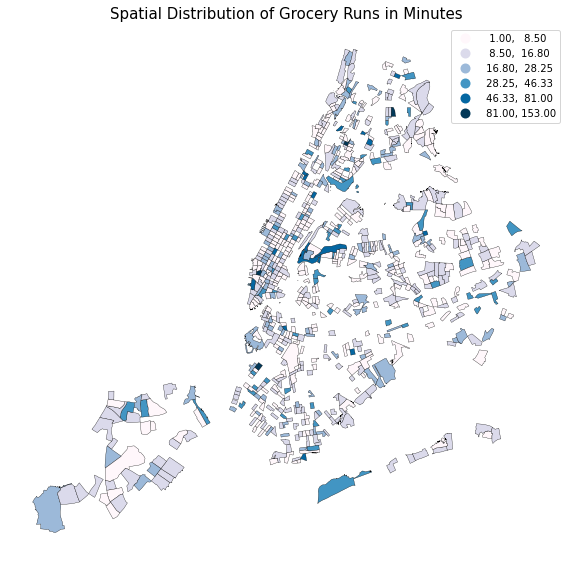

In [430]:
fig, ax1  = plt.subplots(nrows = 1,figsize=(10,10))
df_merge.plot(ax=ax1,
                    column='tract', 
                    edgecolor='k',
                    linewidth=0.3,
                    cmap='PuBu',
                    k = 6,
                    scheme='natural_breaks', 
                    legend=True, 
                   )

vmin, vmax = df_merge['tract'].min(), df_merge['tract'].max()
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='PuBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
#cbar = fig.colorbar(sm, fraction=0.025)

ax1.set_title('Spatial Distribution of Grocery Runs in Minutes', fontsize=15)

plt.axis('off')
plt.show()


Definitely have some high periods of grocery trip duration in the Bronx. There is a fair amount of missing data, but it seems that they're generally worse off than most of NYC. Some large wait times exist in Queens as well.

In [431]:
df_merge_sorted = df_merge.sort_values(by= ['tract'],ascending = False).reset_index()
top_6 = df_merge_sorted.head(6)['geoid']
df_merge_sorted.head(6)[['ntaname','geoid']]
top_6

0    36005017702
1    36005032400
2    36047008400
3    36061006700
4    36081000100
5    36061007600
Name: geoid, dtype: int64

Definitely something to say about food deserts here. The largest wait time in trips for getting groceries is in census tract 177 in the Bronx, the NTA East Concourse-Concourse Village. Now that I know these three census tracts...I think I'm going to try and see where the people tend to go. Let's start with geoid: 36005017702 (the first one).

In [432]:
def destinations(data,geoid):
    tract = data.loc[(data['OTRACT']==geoid) & (data['OTPURP']== activity_number)]
    tract.loc[(tract['DCOUNTY'] == 36005, 'DCOUNTY')] = "Bronx"
    tract.loc[(tract['DCOUNTY'] == 36061, 'DCOUNTY')] = "Manhattan"
    tract.loc[(tract['DCOUNTY'] == 36081, 'DCOUNTY')] = "Queens"
    tract.loc[(tract['DCOUNTY'] == 36085, 'DCOUNTY')] = "SI"
    tract.loc[(tract['DCOUNTY'] == 36047, 'DCOUNTY')] = "Brooklyn"
    tract.rename(columns = {'DTRACT':'geoid'}, inplace = True)
    tract = pd.merge(tract, df_tracts_clean, how='left', on='geoid')
    tract.rename(columns = {'geoid':'d_geoid'}, inplace = True)
    tract.rename(columns = {'OTRACT':'geoid'}, inplace = True)
    tract.rename(columns = {'ntaname':'nta_dest'}, inplace = True)
    tract = pd.merge(tract, df_tracts_clean, how='left', on='geoid')
    tract.rename(columns = {'ntaname':'nta_origin'}, inplace = True)
    tract = tract[['TRPDUR','DCOUNTY','nta_origin','nta_dest']]
    return(tract)

First = destinations(LINKED_NYC,top_6[0])
Second = destinations(LINKED_NYC,top_6[1])
Third = destinations(LINKED_NYC,top_6[2])
Fourth = destinations(LINKED_NYC,top_6[3])
Fifth = destinations(LINKED_NYC,top_6[4])

In [433]:
First

,TRPDUR,DCOUNTY,nta_origin,nta_dest
0,153,Bronx,East Concourse-Concourse Village,Pelham Parkway


Concourse in the Bronx only has one observations. Wondering if this is enough to say that there's a food desert. Very small sample size.

In [434]:
Second

,TRPDUR,DCOUNTY,nta_origin,nta_dest
0,120,Bronx,Bronxdale,Mount Hope


Bronxdale seems to have pretty high travel times generally. Perhaps we can discuss this.

In [435]:
Third

,TRPDUR,DCOUNTY,nta_origin,nta_dest
0,104,Manhattan,Sunset Park West,West Village


Still only one observation...

In [436]:
Fourth

,TRPDUR,DCOUNTY,nta_origin,nta_dest
0,49,Brooklyn,West Village,Madison
1,137,Manhattan,West Village,Central Harlem South


In [437]:
Fifth

,TRPDUR,DCOUNTY,nta_origin,nta_dest
0,1,Queens,Hunters Point-Sunnyside-West Maspeth,Hunters Point-Sunnyside-West Maspeth
1,161,Manhattan,Hunters Point-Sunnyside-West Maspeth,Midtown-Midtown South
